## House Sales Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [135]:
# reading the dataset
HouseSalesData = pd.read_csv("train.csv")

In [136]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(HouseSalesData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [137]:
HouseSalesData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [138]:
# symboling: 
"""20	1-STORY 1946 & NEWER ALL STYLES
       # 30	1-STORY 1945 & OLDER
       # 40	1-STORY W/FINISHED ATTIC ALL AGES
      #  45	1-1/2 STORY - UNFINISHED ALL AGES
      #  50	1-1/2 STORY FINISHED ALL AGES
      #  60	2-STORY 1946 & NEWER
       # 70	2-STORY 1945 & OLDER
       # 75	2-1/2 STORY ALL AGES
      #  80	SPLIT OR MULTI-LEVEL
      #  85	SPLIT FOYER
      #  90	DUPLEX - ALL STYLES AND AGES
     #  120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
     #  150	1-1/2 STORY PUD - ALL AGES
      # 160	2-STORY PUD - 1946 & NEWER
      # 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
     #  190	2 FAMILY CONVERSION - ALL STYLES AND AGES """
# Most sales are 1 - Story 1946 & newer all styles, 2 - story 1946 & Newer and 1-1/2 Story finished all ages
HouseSalesData['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [139]:
"""MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density """

# Most values are for RL, RM
HouseSalesData['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [140]:
"""Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved """

HouseSalesData['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [141]:
""" Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access"""

HouseSalesData['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [142]:
HouseSalesData['Alley'].isnull().sum()
# This column can be deleted as it as a lot of null values

1369

In [143]:
"""LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular"""
HouseSalesData['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [144]:
'''LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression'''
HouseSalesData['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [145]:
'''Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only'''
HouseSalesData['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [146]:
'''LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property'''
HouseSalesData['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [147]:
'''LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope'''
HouseSalesData['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [148]:
'''Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker'''
HouseSalesData['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [149]:
'''Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad'''
HouseSalesData['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [150]:
'''Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad'''
HouseSalesData['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [151]:
'''BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit'''
HouseSalesData['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [152]:
'''HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level'''
HouseSalesData['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [153]:
'''OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor'''
HouseSalesData['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [154]:
'''OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor'''
HouseSalesData['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [155]:
'''RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed'''
HouseSalesData['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [156]:
'''RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles'''
HouseSalesData['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [157]:
'''Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles'''
HouseSalesData['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [158]:
'''Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles'''
HouseSalesData['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [159]:
'''MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone'''
HouseSalesData['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [160]:
'''ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor'''
HouseSalesData['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [161]:
'''ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor'''
HouseSalesData['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [162]:
'''Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood'''
HouseSalesData['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [163]:
'''BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement'''
HouseSalesData['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [164]:
'''BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement'''
HouseSalesData['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [165]:
'''BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement'''
HouseSalesData['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [166]:
'''BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement'''
HouseSalesData['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [167]:
'''BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement'''
HouseSalesData['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [168]:
'''Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace'''
HouseSalesData['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [169]:
'''HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor'''
HouseSalesData['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [170]:
'''CentralAir: Central air conditioning

       N	No
       Y	Yes'''
HouseSalesData['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [171]:
'''Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed'''
HouseSalesData['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [172]:
'''KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor'''
HouseSalesData['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [173]:
'''Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only'''
HouseSalesData['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [174]:
'''FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace'''
HouseSalesData['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [175]:
'''GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage'''
HouseSalesData['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [176]:
'''GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage'''
HouseSalesData['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [177]:
'''GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage'''
HouseSalesData['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [178]:
'''GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage'''
HouseSalesData['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [179]:
'''PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel'''
HouseSalesData['PavedDrive'].astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [180]:
'''PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool'''
HouseSalesData['PoolQC'].astype('category').value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [181]:
'''Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence'''
HouseSalesData['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [182]:
'''MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None'''
HouseSalesData['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [183]:
'''SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other'''
HouseSalesData['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [184]:
'''SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)'''
HouseSalesData['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [185]:
null_counts = HouseSalesData.isnull().sum()

# Filter columns with more than 250 null values
null_counts[null_counts > 100]

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [186]:
HouseSalesData['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

## The following columns can be deleted as there as high number of null values
LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406

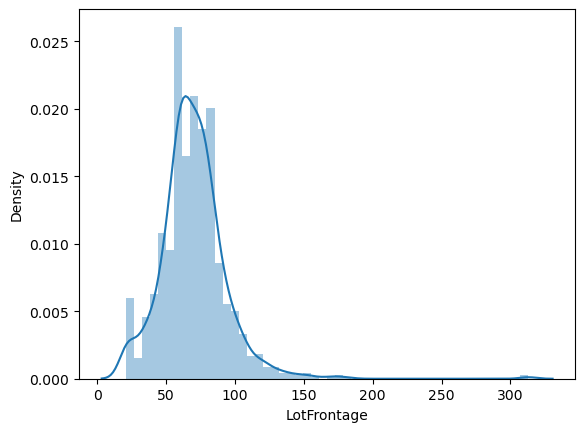

In [187]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(HouseSalesData['LotFrontage'])
plt.show()

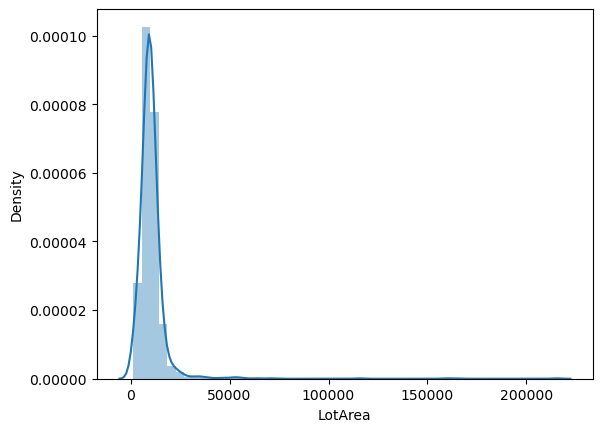

In [188]:
# LotArea: Lot size in square feet
sns.distplot(HouseSalesData['LotArea'])
plt.show()

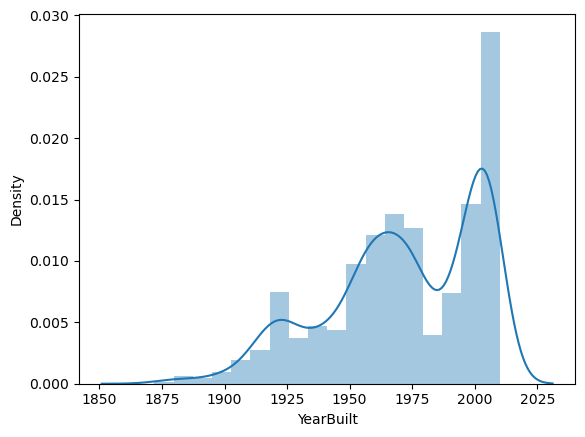

In [189]:
# YearBuilt: Original construction date
sns.distplot(HouseSalesData['YearBuilt'])
plt.show()

In [190]:
HouseSalesData['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3
1989     3

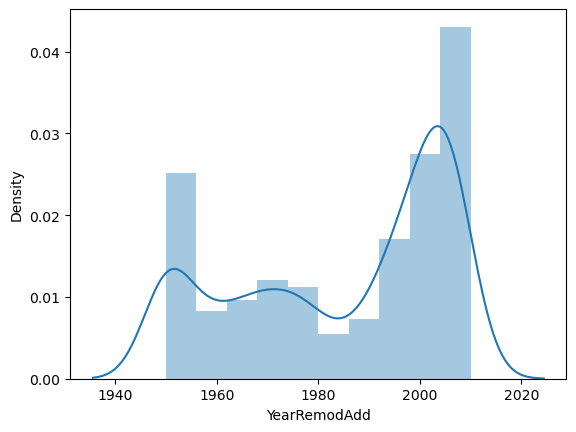

In [191]:
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
sns.distplot(HouseSalesData['YearRemodAdd'])
plt.show()

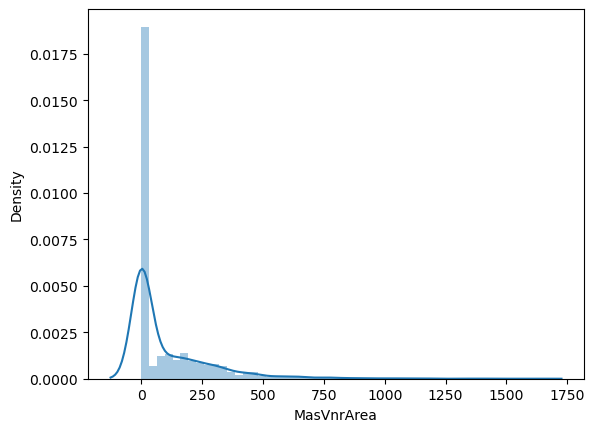

In [192]:
# MasVnrArea: Masonry veneer area in square feet
sns.distplot(HouseSalesData['MasVnrArea'])
plt.show()

In [193]:
HouseSalesData['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

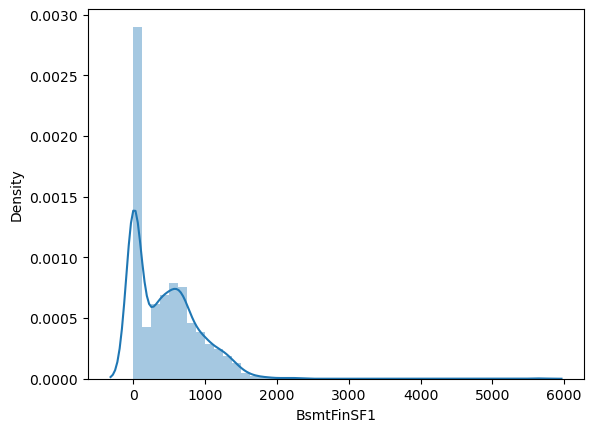

In [194]:
# BsmtFinSF1: Type 1 finished square feet
sns.distplot(HouseSalesData['BsmtFinSF1'])
plt.show()

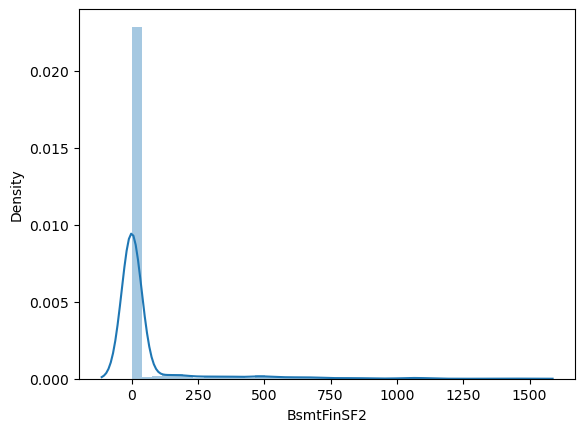

In [195]:
# BsmtFinSF2: Type 2 finished square feet
sns.distplot(HouseSalesData['BsmtFinSF2'])
plt.show()

In [196]:
HouseSalesData['BsmtFinSF2'].value_counts()

0       1293
180        5
374        3
551        2
147        2
294        2
391        2
539        2
96         2
480        2
182        2
468        2
117        2
64         2
290        2
469        2
279        2
287        2
93         2
712        2
41         2
149        1
1061       1
466        1
396        1
354        1
215        1
841        1
273        1
465        1
400        1
682        1
557        1
230        1
193        1
411        1
634        1
324        1
486        1
500        1
823        1
435        1
1085       1
345        1
764        1
377        1
128        1
630        1
127        1
106        1
791        1
240        1
276        1
163        1
627        1
110        1
872        1
352        1
334        1
546        1
420        1
105        1
972        1
173        1
68         1
661        1
608        1
547        1
906        1
81         1
144        1
375        1
438        1
1031       1
168        1
211        1
492        1

In [197]:
HouseSalesData.drop(['BsmtFinSF2'],axis=1, inplace=True)

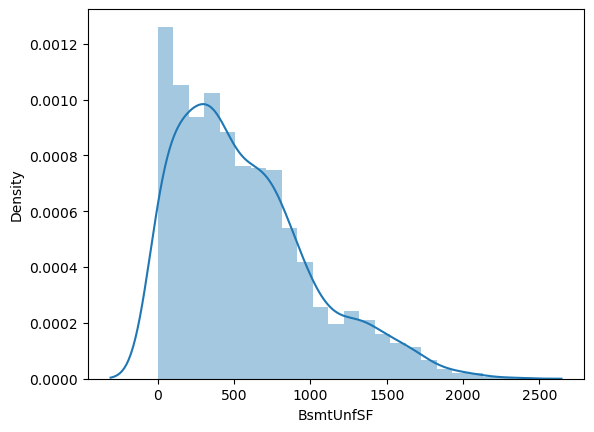

In [198]:
# BsmtUnfSF: Unfinished square feet of basement area
sns.distplot(HouseSalesData['BsmtUnfSF'])
plt.show()

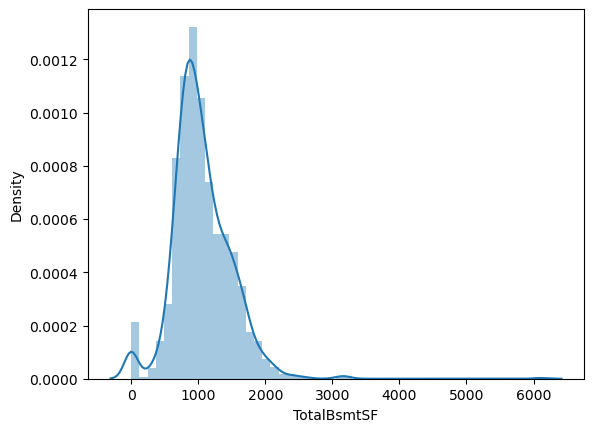

In [199]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(HouseSalesData['TotalBsmtSF'])
plt.show()

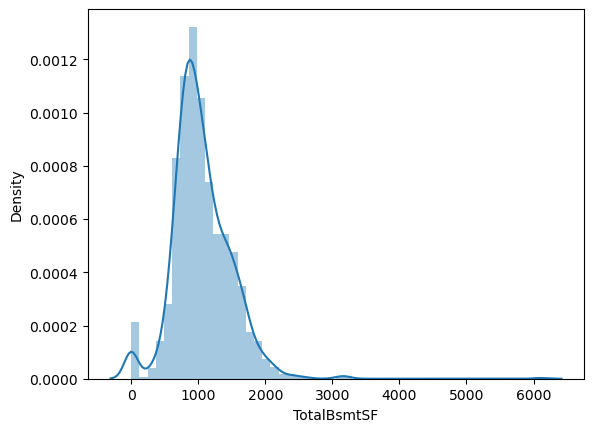

In [200]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(HouseSalesData['TotalBsmtSF'])
plt.show()

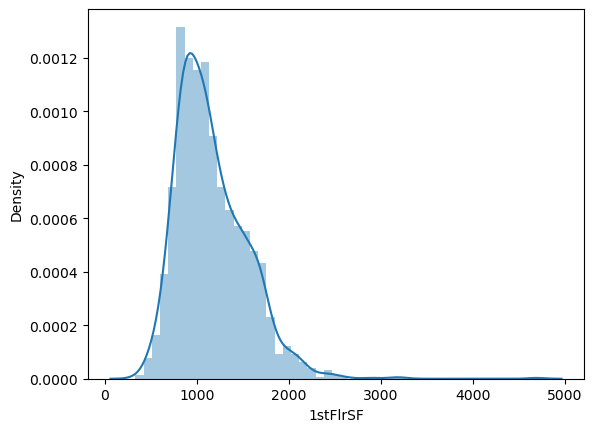

In [201]:

#1stFlrSF: First Floor square feet
sns.distplot(HouseSalesData['1stFlrSF'])
plt.show()


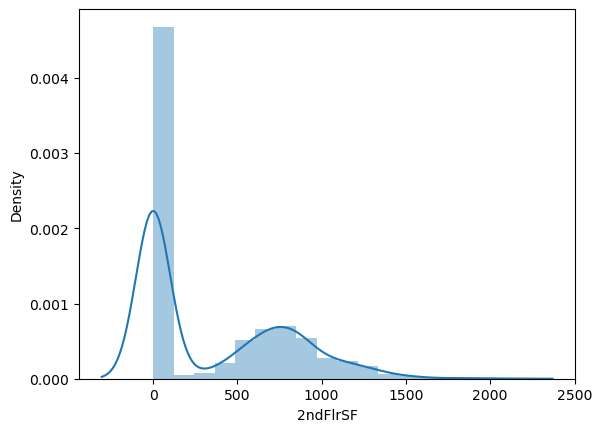

In [202]:
#2ndFlrSF: Second floor square feet
sns.distplot(HouseSalesData['2ndFlrSF'])
plt.show()

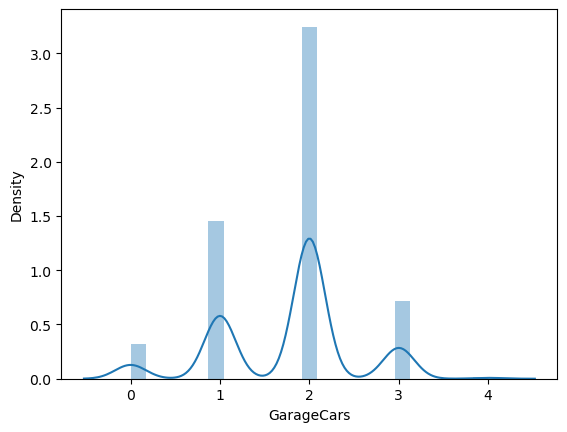

In [203]:
#GarageCars: No of cars in the garage
sns.distplot(HouseSalesData['GarageCars'])
plt.show()

In [204]:
HouseSalesData['2ndFlrSF'].value_counts()

0       829
728      10
504       9
546       8
672       8
600       7
720       7
896       6
862       5
780       5
689       5
840       5
756       5
739       4
551       4
804       4
878       4
741       4
702       4
660       3
807       3
1254      3
596       3
729       3
858       3
704       3
793       3
846       3
888       3
880       3
677       3
886       3
915       3
670       3
795       3
866       3
871       3
832       3
668       3
742       3
684       3
698       2
408       2
240       2
872       2
806       2
748       2
685       2
406       2
576       2
1140      2
567       2
1040      2
564       2
1177      2
534       2
912       2
625       2
568       2
651       2
844       2
709       2
800       2
829       2
648       2
864       2
975       2
842       2
764       2
650       2
584       2
1020      2
809       2
445       2
560       2
762       2
1330      2
601       2
790       2
797       2
612       2
876       2
620       2
850 

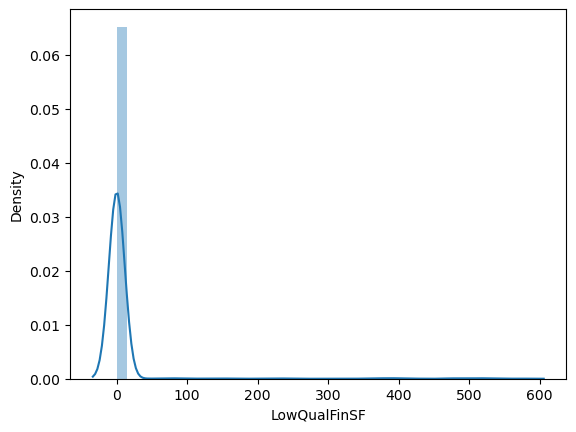

In [205]:
#LowQualFinSF: Low quality finished square feet (all floors)
sns.distplot(HouseSalesData['LowQualFinSF'])
plt.show()

In [206]:
HouseSalesData['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [207]:
HouseSalesData.drop(['LowQualFinSF'],axis=1, inplace=True)

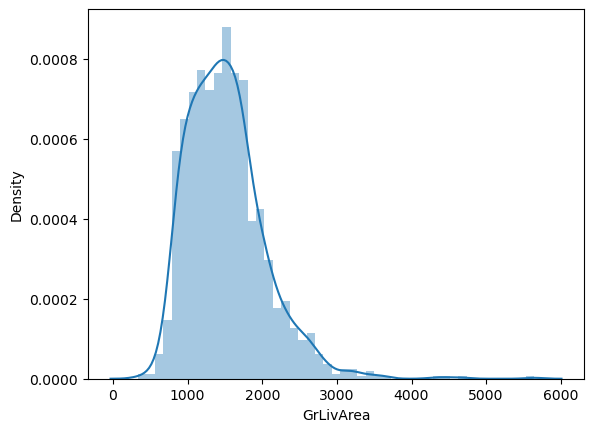

In [208]:
#GrLivArea: Above grade (ground) living area square feet
sns.distplot(HouseSalesData['GrLivArea'])
plt.show()

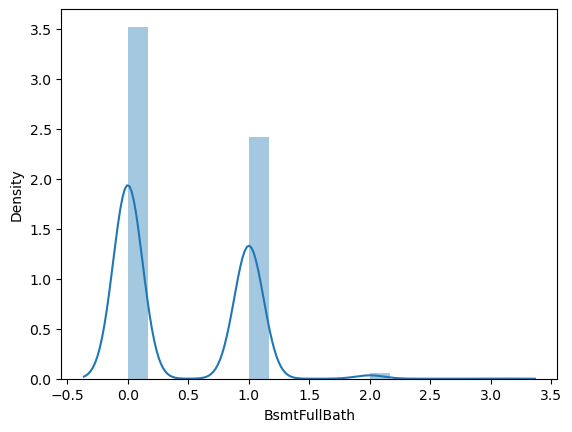

In [209]:
#BsmtFullBath: Basement full bathrooms
sns.distplot(HouseSalesData['BsmtFullBath'])
plt.show()

In [210]:
HouseSalesData['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

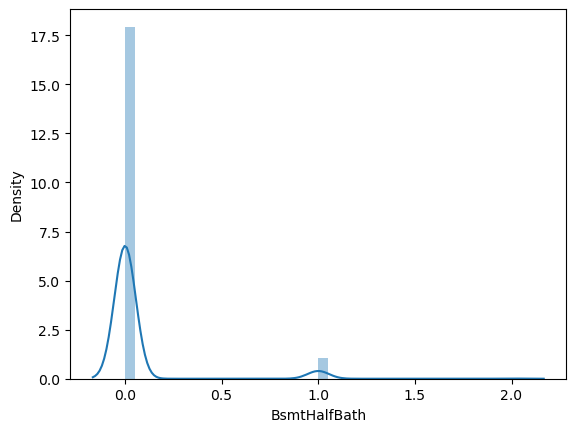

In [211]:
#BsmtHalfBath: Basement half bathrooms
sns.distplot(HouseSalesData['BsmtHalfBath'])
plt.show()

In [212]:
HouseSalesData['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [213]:
HouseSalesData.drop(['BsmtHalfBath'], axis=1, inplace=True)

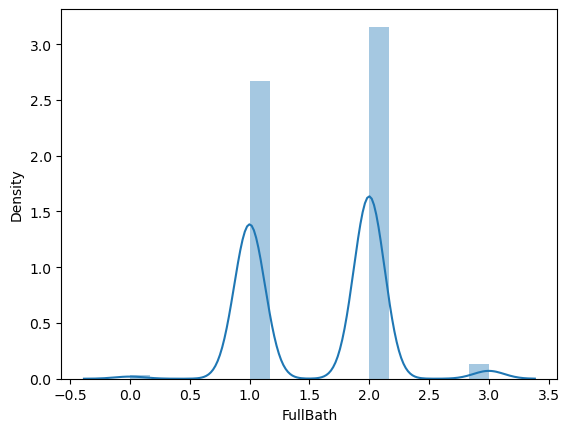

In [214]:
#FullBath: Full bathrooms above grade
sns.distplot(HouseSalesData['FullBath'])
plt.show()

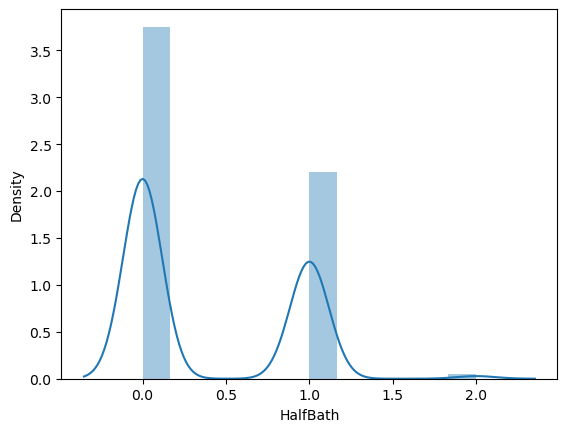

In [215]:
#HalfBath: Half baths above grade
sns.distplot(HouseSalesData['HalfBath'])
plt.show()

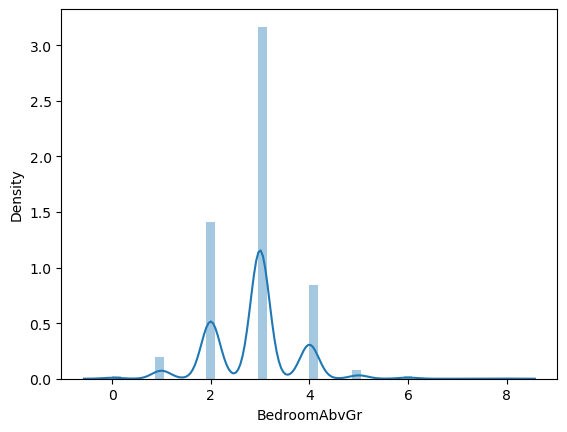

In [216]:
#BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
sns.distplot(HouseSalesData['BedroomAbvGr'])
plt.show()

In [217]:
HouseSalesData['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

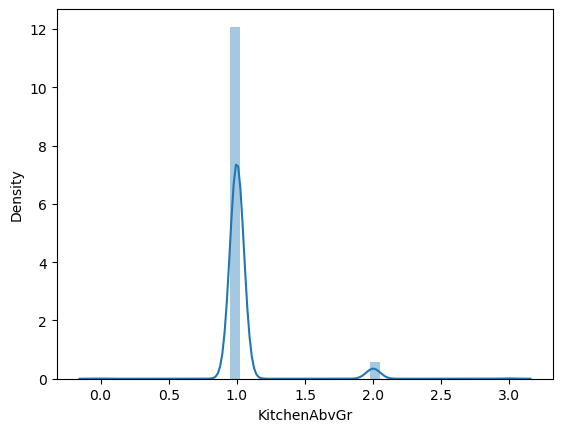

In [218]:
#KitchenAbvGr: Kitchens above grade
sns.distplot(HouseSalesData['KitchenAbvGr'])
plt.show()

In [219]:
HouseSalesData['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

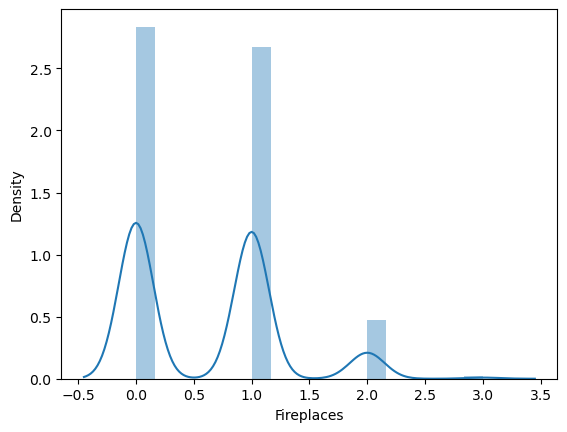

In [220]:
#Fireplaces: No of fire places in the house
sns.distplot(HouseSalesData['Fireplaces'])
plt.show()

In [221]:
HouseSalesData['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

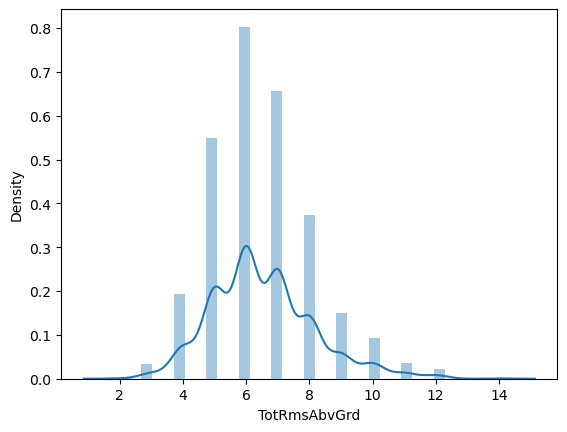

In [222]:
#TotRmsAbvGrd: No of Rms and their grade
sns.distplot(HouseSalesData['TotRmsAbvGrd'])
plt.show()

In [223]:
HouseSalesData['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [224]:
HouseSalesData['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406

These are the number of null values present

In [225]:
HouseSalesData.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
HouseSalesData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [226]:
# all numeric (float and int) variables in the dataset
hsd_numeric = HouseSalesData.select_dtypes(include=['float64', 'int64'])

# but these would include columns which look like numeric but are categorical. We need to convert them first to categorical.
hsd_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [227]:
hsd_numeric.drop(['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold',
                  'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars'], axis=1, inplace=True)
hsd_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,150,856,856,854,1710,1,2003.0,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,284,1262,1262,0,1262,0,1976.0,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,434,920,920,866,1786,1,2001.0,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,540,756,961,756,1717,1,1998.0,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,1,2000.0,836,192,84,0,0,0,0,0,250000


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.


In [228]:
# correlation matrix
cor = hsd_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.132644,0.392075,0.457181,0.080177,0.402797,0.100949,0.070250,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,-0.024947,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,0.390857,0.085310,0.252691,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.153484,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.190708,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,0.322445,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.233449,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.070832,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
GrLivArea,0.402797,0.263116,0.390857,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,0.231197,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.708624
BsmtFullBath,0.100949,0.158155,0.085310,0.649212,-0.422900,0.307351,0.244671,-0.169494,0.034836,1.000000,0.124553,0.179189,0.175315,0.067341,-0.049911,-0.000106,0.023148,0.067616,-0.023047,0.227122


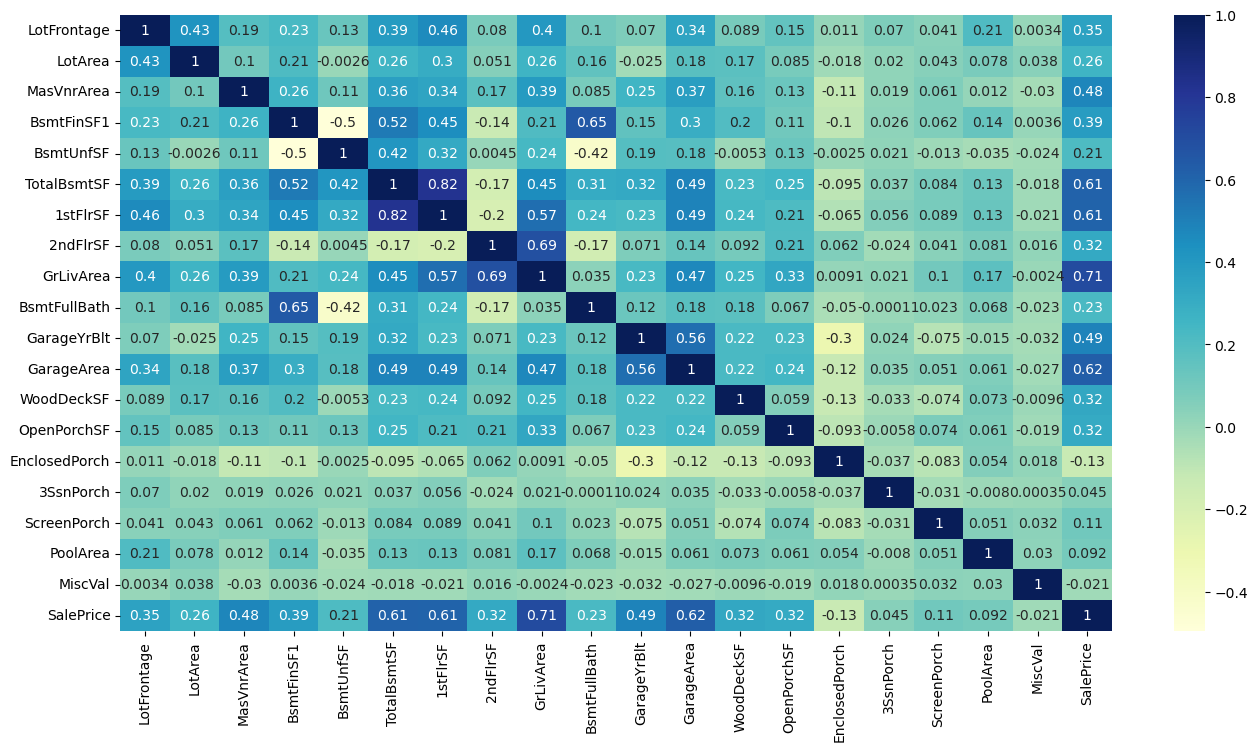

In [229]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalesPrice is highly (positively) correlated with GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, GarageArea, MasVnrArea (notice how all of these variables represent the quality, area and size of the house)

- SalesPrice is negatively correlated to MiscVal, EnclosedPorch . This suggests that there are not many values in the numerical values that negatively affect the price of the flat.

Correlation among independent variables:
- Many independent variables are highly correlated :1stFlrSF and TotalBsmtSF, GrLivArea and 2ndFlrSF, BsmtFullBath and BsmtFinSF1


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except  'MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 

In [230]:
HouseSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [231]:
# converting 'MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars' to categorical
col_to_convert = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']
HouseSalesData[col_to_convert] = HouseSalesData[col_to_convert].astype('object')
HouseSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [232]:
# split into X and y
X = HouseSalesData.loc[:, ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour',
                           'Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
                           'BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                           'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual',
                           'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                           'BsmtFinSF1','BsmtFinType2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir',
                           'Electrical','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath',
                           'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                           'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea',
                           'GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                           '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SaleType','SaleCondition']] # predictors in variable X

y = HouseSalesData['SalePrice'] # response variable in Y

In [233]:
# creating dummy variables for categorical variables

# subset all categorical variables
hsd_categorical = X.select_dtypes(include=['object'])
hsd_categorical.head()


,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,2,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,2,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,2,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,3,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,3,TA,TA,Y,12,2008,WD,Normal


In [234]:
# convert into dummies - one hot encoding
hsd_dummies = pd.get_dummies(hsd_categorical, drop_first=True)
hsd_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [235]:
# drop categorical variables 
X = X.drop(list(hsd_categorical.columns), axis=1)

In [236]:
# concat dummy variables with X
X = pd.concat([X, hsd_dummies], axis=1)

In [237]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=469)

In [238]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [239]:
print(X_train.isna().sum())
print(y_train.isna().sum())

LotFrontage              177
LotArea                    0
MasVnrArea                 4
BsmtFinSF1                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
GrLivArea                  0
BsmtFullBath               0
GarageYrBlt               58
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MSSubClass_30              0
MSSubClass_40              0
MSSubClass_45              0
MSSubClass_50              0
MSSubClass_60              0
MSSubClass_70              0
MSSubClass_75              0
MSSubClass_80              0
MSSubClass_85              0
MSSubClass_90              0
MSSubClass_120             0
MSSubClass_160             0
MSSubClass_180             0
MSSubClass_190             0
MSZoning_FV                0
MSZoning_RH   

In [240]:
na_counts = X_train.isna().sum()

# Print columns with more than one NaN value
columns_with_na = na_counts[na_counts > 1].index
print("Columns with more than one NaN value:")
print(X_train[columns_with_na])

Columns with more than one NaN value:
      LotFrontage  MasVnrArea  GarageYrBlt
210     -0.125644   -0.572835          NaN
318      0.821847    0.841500     0.587252
239     -0.743573   -0.572835    -1.195512
986     -0.455206   -0.572835    -1.154995
1416    -0.414011   -0.572835    -0.304130
390     -0.825963   -0.572835    -0.020508
1005    -0.208034    0.642609    -0.061026
568      0.368699   -0.572835     0.182078
342           NaN    1.305579    -1.195512
114     -0.372815   -0.572835    -1.357582
499     -0.002058   -0.572835    -0.830856
365     -0.455206   -0.572835    -0.587752
308           NaN   -0.572835    -0.709304
797     -0.537596   -0.572835    -1.033443
703      0.245113   -0.572835     0.830356
858      0.409895    0.471342    -0.101543
25       1.645752    2.963002     1.154495
88       1.439776   -0.572835          NaN
1129    -0.414011    0.421619     0.060526
1425     0.409895    0.769678    -0.749821
728      0.615871   -0.047984    -0.425682
883     -0.41401

In [241]:


X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

X_test.fillna(X_test.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting house sales prices, a dataset using linear regression.

In [242]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [243]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-4980146009530.902
[ 2.30607767e+03  7.46179289e+03  2.42203564e+03  2.26110395e+03
 -5.79771846e+03  1.43408886e+04  3.37405616e+04  3.99324856e+04
 -8.51708130e+03  8.31166725e+02  6.99845348e+02  4.02543150e+02
  4.46608729e+02  1.61404052e+03  9.80627220e+02  1.87987352e+03
  1.74341770e+03  2.79151968e+03  2.63571630e+02 -8.56171681e+02
 -8.48339937e+02 -4.72730669e+02 -2.79318131e+03  6.43984411e+03
  7.78869980e+02 -4.80392082e+03 -2.11657890e+03 -1.75768255e+03
  1.14464405e+15 -1.84971444e+02  2.17198376e+03 -6.19750293e+02
 -1.31094032e+15  8.63460938e+03  5.25802930e+03  2.00061797e+04
  1.46695098e+04  8.74988281e+02 -4.96093750e+00  1.52824219e+02
  1.09789062e+03  2.31546875e+02 -5.58437500e+02  1.07418750e+03
 -1.87036621e+02  2.18260156e+03 -1.27368750e+03  1.94554688e+02
 -8.79140625e+01  8.41265625e+02 -2.56181250e+03  8.80140625e+02
  7.09968750e+02  1.52918750e+03  5.43218750e+02  7.44812500e+02
  5.64532812e+03 -1.10522656e+03  1.53760156e+03  1.24356250e+03
 -1.14

In [244]:
from sklearn.metrics import r2_score, mean_squared_error

In [245]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9690293747688095
-2.181952717542499e+21
197614231231.7116
6.150297465568974e+33
193549687.78816023
1.4041775035545604e+31


## Ridge and Lasso Regression

Let's now try predicting house sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [246]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [247]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [248]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.23935795e+02  2.77225306e+03  2.85456938e+03  2.61628643e+03
  6.83718156e+02  4.06650947e+03  5.51586990e+03  3.57045017e+03
  6.93298599e+03  2.24305856e+03  9.33301417e+02  2.91517489e+03
  1.58955624e+03  1.18819866e+03 -4.88381944e+01  1.36021510e+03
  1.67645511e+03 -3.76859481e+02 -2.32596308e+01 -1.17962289e+03
 -3.92463478e+02  5.86492998e+00 -8.46080117e+01  6.23150009e+02
  5.82657318e+02 -8.03687979e+01 -5.12744413e+02 -2.70984455e+02
 -8.09555706e+02 -1.09863216e+03 -1.25070595e+03 -6.23641609e+02
 -1.02295798e+03  6.54364015e+02 -1.52756751e+02  1.30716665e+03
 -9.17762391e+02  4.87688725e+02  2.29943302e+02 -1.39906206e+03
 -1.32441874e+02  9.22093860e+02  2.88508097e+02  1.35030294e+03
 -5.71787720e+02  1.93953935e+03 -7.79135663e+02 -2.50365093e+02
 -5.32695139e+02  9.28436463e+02  1.70419594e+02  1.29855224e+02
 -4.07019630e+02 -1.99205649e+02  9.21385477e+02 -9.55932281e+02
  3.00142258e+03 -3.05593232e+03 -5.76811531e+02 -1.26441888e+03
 -1.25134307e+03 -1.20517

In [249]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9152144631283813
0.85670237914093
540990973329.7561
403914799484.8501
529863832.8401137
922179907.4996578


## Lasso

In [250]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [251]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [252]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [253]:
lasso.coef_

array([-0.00000000e+00,  3.58453037e+03,  9.83333476e+02,  2.51466067e+03,
       -0.00000000e+00,  4.90631964e+03,  6.30022256e+02,  0.00000000e+00,
        2.77586968e+04,  2.22182219e+03,  1.29088763e+03,  0.00000000e+00,
        3.76946010e+02,  4.58557434e+02, -0.00000000e+00,  1.44637141e+03,
        1.42616053e+03, -2.14386057e+02,  0.00000000e+00, -1.42706677e+02,
       -0.00000000e+00,  1.59424969e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.35587953e+03,  0.00000000e+00, -0.00000000e+00,
       -1.62100241e+02, -6.09000042e+02, -7.54162598e+02, -0.00000000e+00,
       -1.34543123e+03,  0.00000000e+00,  0.00000000e+00,  2.28923523e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.23498217e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.41659700e+03,
       -2.57735037e+02,  2.29436961e+03, -5.30504485e+01,  0.00000000e+00,
       -0.00000000e+00,  2.48639757e+02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [254]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9363606307479768
0.8338276638361547
406063646985.8618
468392046142.61633
397711701.25941414
1069388233.2023203


In [255]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.690294e-01,9.152145e-01,9.363606e-01
1,R2 Score (Test),-2.181953e+21,8.567024e-01,8.338277e-01
2,RSS (Train),1.976142e+11,5.409910e+11,4.060636e+11
3,RSS (Test),6.150297e+33,4.039148e+11,4.683920e+11
4,MSE (Train),1.391221e+04,2.301877e+04,1.994271e+04
5,MSE (Test),3.747236e+15,3.036742e+04,3.270150e+04


## Lets observe the changes in the coefficients after regularization

In [256]:
betas = pd.DataFrame(index=X.columns)

In [257]:
betas.rows = X.columns

In [258]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [259]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,2.306078e+03,523.935795,-0.000000
LotArea,7.461793e+03,2772.253064,3584.530368
MasVnrArea,2.422036e+03,2854.569376,983.333476
BsmtFinSF1,2.261104e+03,2616.286427,2514.660671
BsmtUnfSF,-5.797718e+03,683.718156,-0.000000
TotalBsmtSF,1.434089e+04,4066.509469,4906.319639
1stFlrSF,3.374056e+04,5515.869900,630.022256
2ndFlrSF,3.993249e+04,3570.450165,0.000000
GrLivArea,-8.517081e+03,6932.985991,27758.696801
BsmtFullBath,8.311667e+02,2243.058559,2221.822189


In [260]:
coefficients = ridge.coef_
abs_coefficients = np.abs(coefficients)

# Create a mapping of column names to coefficients
coefs = dict(zip(X.columns, abs_coefficients))
# Sort the coefficients by their absolute values in descending order
sorted_coefs = {k: v for k, v in sorted(coefs.items(), key=lambda item: item[1], reverse=True)}

# Print the top predictors
n = 10  # Display the top 2 predictors (you can change this number)
print(f"Top {n} predictors:")
for predictor, coefficient in list(sorted_coefs.items())[:10]:
    print(f"{predictor}: Coefficient = {coefficient}")

Top 10 predictors:
GrLivArea: Coefficient = 6932.985990682625
OverallQual_9: Coefficient = 6256.853550154489
Condition2_PosN: Coefficient = 6036.555751413104
OverallQual_10: Coefficient = 5675.822878875706
FullBath_3: Coefficient = 5518.801230840735
1stFlrSF: Coefficient = 5515.869900314615
GarageCars_3: Coefficient = 5208.212756095622
TotRmsAbvGrd_10: Coefficient = 4516.826537781466
Neighborhood_NridgHt: Coefficient = 4436.598322360663
Neighborhood_NoRidge: Coefficient = 4181.717973699532


In [261]:
coefficients = lasso.coef_
abs_coefficients = np.abs(coefficients)

# Create a mapping of column names to coefficients
coefs = dict(zip(X.columns, abs_coefficients))
# Sort the coefficients by their absolute values in descending order
sorted_coefs = {k: v for k, v in sorted(coefs.items(), key=lambda item: item[1], reverse=True)}

# Print the top predictors
n = 10  # Display the top 2 predictors (you can change this number)
print(f"Top {n} predictors:")
for predictor, coefficient in list(sorted_coefs.items())[:10]:
    print(f"{predictor}: Coefficient = {coefficient}")

Top 10 predictors:
GrLivArea: Coefficient = 27758.696801215596
RoofMatl_CompShg: Coefficient = 22086.3910662944
RoofMatl_WdShngl: Coefficient = 14001.754137749063
Condition2_PosN: Coefficient = 13676.77413408734
RoofMatl_Tar&Grv: Coefficient = 12653.132801651222
OverallQual_9: Coefficient = 11868.078934410565
OverallQual_10: Coefficient = 10100.88327775983
OverallQual_8: Coefficient = 8781.98744435661
RoofMatl_WdShake: Coefficient = 8595.91995711005
GarageCars_3: Coefficient = 7032.352145560999


### Question 3: Removing the first 5 top predictors for Lasso regression

In [262]:
X2_train = X_train.drop(['GrLivArea','RoofMatl_CompShg','RoofMatl_WdShngl','Condition2_PosN','RoofMatl_Tar&Grv'],axis=1)
X2_test = X_test.drop(['GrLivArea','RoofMatl_CompShg','RoofMatl_WdShngl','Condition2_PosN','RoofMatl_Tar&Grv'],axis=1)

In [263]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X2_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [264]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [265]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X2_train, y_train) 

Lasso(alpha=1000)

In [266]:
lasso.coef_

array([-0.00000000e+00,  2.77712525e+03,  4.98750877e+02,  0.00000000e+00,
       -0.00000000e+00,  3.56429381e+03,  1.70619518e+04,  1.48783290e+04,
        2.28930594e+03,  2.25794126e+02,  2.32134496e+03,  1.00100211e+03,
        0.00000000e+00, -0.00000000e+00,  1.29057699e+03,  1.05663239e+03,
       -0.00000000e+00,  0.00000000e+00, -6.85635113e+02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.56436353e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.85939373e+02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.41447826e+03, -1.27083612e+02,
        2.14481112e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.13877448e+02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [267]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X2_train)
y_pred_test = lasso.predict(X2_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.895442614766701
0.8557254382844408
667149182434.5726
406668514918.4472
653427211.0034992
928466929.0375507


In [268]:
coefficients = lasso.coef_
abs_coefficients = np.abs(coefficients)

# Create a mapping of column names to coefficients
coefs = dict(zip(X.columns, abs_coefficients))
# Sort the coefficients by their absolute values in descending order
sorted_coefs = {k: v for k, v in sorted(coefs.items(), key=lambda item: item[1], reverse=True)}

# Print the top predictors
n = 10  # Display the top 2 predictors (you can change this number)
print(f"Top {n} predictors:")
for predictor, coefficient in list(sorted_coefs.items())[:10]:
    print(f"{predictor}: Coefficient = {coefficient}")

Top 10 predictors:
1stFlrSF: Coefficient = 17061.95181063459
2ndFlrSF: Coefficient = 14878.32902308476
OverallQual_7: Coefficient = 13169.029171517459
OverallQual_6: Coefficient = 9245.380359974513
OverallQual_8: Coefficient = 8806.516872639098
GarageType_Detchd: Coefficient = 7613.166648870625
Electrical_FuseP: Coefficient = 6153.533692151221
Neighborhood_NoRidge: Coefficient = 5182.25970731186
Neighborhood_NWAmes: Coefficient = 4800.673711730581
Functional_Min2: Coefficient = 4746.0759737687495
